# Mapping COVID19 data in Python

## Help
- About this interface https://jupyterlab.readthedocs.io/en/stable/user/interface.html
- Jupyter keyboard shortcuts
https://yoursdata.net/jupyter-lab-shortcut-and-magic-functions-tips/
- Plotly Express documentation https://plotly.com/python/plotly-express/
- Working with csv and pandas https://towardsdatascience.com/data-science-with-python-intro-to-loading-and-subsetting-data-with-pandas-9f26895ddd7f

# Hello Jupyter Newbies

If this is the first time for you to use Jupyter Notebooks, I highly recommend you visit the help links above. 

In order to run the code sequentially on this page, highlight a cell (you should see a blue bar on the left side) and use the following keyboard shortcut to run the cell:

- `shift + enter`

This should take you to the next cell, where you can repeat `shift + enter` until you reach the end. You can modify the contents of any cell to experiment with the code, but note that doing so may impact the subsequent code.

## Libraries

For this session, we will be using two libraries: plotly and pandas. Make sure to install the libraries using `pip` or `conda`. If you have reached this Jupyter notebook via the IDRE GitHub page, or, if you installed Anaconda and ran `requirements.txt`, your library should already be installed. If not, uncomment the install code below and run them.


In [ ]:
# !conda install plotly --yes
# !conda install pandas

Import libraries

In [43]:
import plotly.express as px
import pandas as pd

## Data

The LA Times Data Desk team has taken the lead to centralize Los Angeles based COVID-19 related datasets. Shortly after the pandemic erupted in the US, they have maintained the following page to report real-time statistics.

https://www.latimes.com/projects/california-coronavirus-cases-tracking-outbreak/

In order to maintain transparency over their methods, they have made multiple datasets available on this GitHub page, allowing academics to use it for research purposes under these terms and services (https://www.latimes.com/terms-of-service).

https://github.com/datadesk/california-coronavirus-data

## Using Python's pandas library to get data

Get the data from LA Times. We can grab the data directly from their github page. By doing so, it ensures that we are grabbling the latest dataset that they have uploaded on their site. Note that it also adds the risk that if they change their data model, it can potentially break the methods used in this session.

- <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">reference for pandas read_csv</a>

In [44]:
latimes = pd.read_csv(
    "https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/cdph-state-totals.csv"
)

Preview the data by typing its name out. If you are using command line and not Jupyter, you have to use the print() method.

In [45]:
latimes.head()
# if using command line
# print(latimes)

,date,confirmed_cases,deaths,travel,person_to_person,community_spread,under_investigation,other_causes,self_monitoring,age_0_to_17,...,total_tests,received_tests,pending_tests,confirmed_hospitalizations,confirmed_icu,suspected_hospitalizations,suspected_icu,healthcare_worker_infections,healthcare_worker_deaths,source_url
0,2020-06-30,222917,5980.0,NaN,NaN,NaN,NaN,NaN,NaN,17739.0,...,4167139.0,NaN,NaN,5077.0,1528.0,1389.0,223.0,14942.0,89.0,NaN
1,2020-06-29,216550,5936.0,NaN,NaN,NaN,NaN,NaN,NaN,17157.0,...,4061692.0,NaN,NaN,4776.0,1465.0,1403.0,221.0,14827.0,88.0,https://www.cdph.ca.gov/Programs/OPA/Pages/NR2...
2,2020-06-28,211243,5905.0,NaN,NaN,NaN,NaN,NaN,NaN,16546.0,...,3955952.0,NaN,NaN,4577.0,1385.0,1379.0,217.0,14699.0,86.0,https://www.cdph.ca.gov/Programs/OPA/Pages/NR2...
3,2020-06-27,206433,5872.0,NaN,NaN,NaN,NaN,NaN,NaN,16093.0,...,3862310.0,NaN,NaN,4494.0,1379.0,1296.0,183.0,14520.0,86.0,https://www.cdph.ca.gov/Programs/OPA/Pages/NR2...
4,2020-06-26,200461,5812.0,NaN,NaN,NaN,NaN,NaN,NaN,15449.0,...,3771314.0,NaN,NaN,4380.0,1364.0,1259.0,206.0,14218.0,86.0,https://www.cdph.ca.gov/Programs/OPA/Pages/NR2...


In [46]:
latimes.columns

Index(['date', 'confirmed_cases', 'deaths', 'travel', 'person_to_person',
       'community_spread', 'under_investigation', 'other_causes',
       'self_monitoring', 'age_0_to_17', 'age_18_to_49', 'age_50_to_64',
       'age_65_and_up', 'age_18_to_64', 'age_unknown', 'gender_male',
       'gender_female', 'gender_unknown', 'total_tests', 'received_tests',
       'pending_tests', 'confirmed_hospitalizations', 'confirmed_icu',
       'suspected_hospitalizations', 'suspected_icu',
       'healthcare_worker_infections', 'healthcare_worker_deaths',
       'source_url'],
      dtype='object')

# Scatter Plots

Documentation: https://plotly.com/python/line-and-scatter/


Let's create a non-spatial scatter plot. We will use the <a href="https://plotly.com/python/plotly-express/" target="_blank">plotly express</a> library, which claims to be a "terse, consistent, high-level API for rapid data exploration and figure generation." It is also great for producing quick and easy maps, which is one of the main goals in this session! And, unlike other libraries, plotly express allows for user interaction with the graphic elements it produces.

To create a scatter plot use the `px.scatter` function. The first argument must be the data frame you want to feed it, in this case, we will use our full dataset, `latimes`. It must be followed with an `x` and `y` values. Let's put `date` in the x axis, and `confirmed_cases` in the y axis.

### Create a simple scatter plot

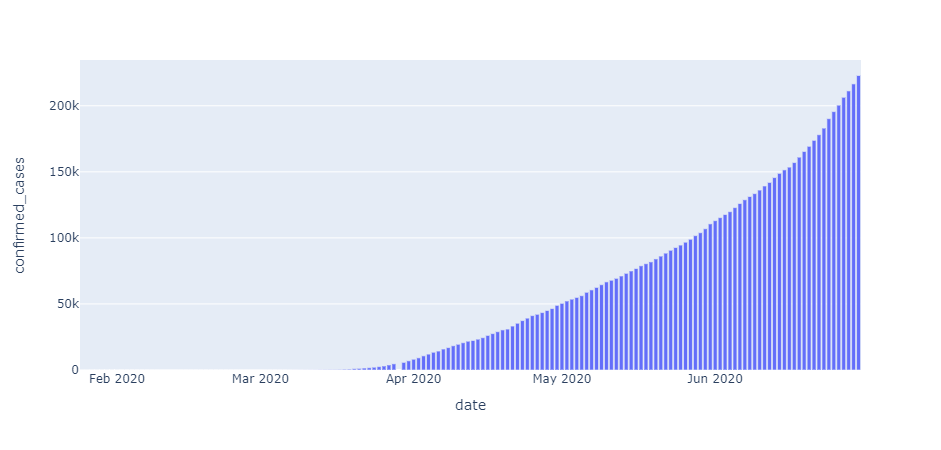

In [47]:
fig = px.bar(latimes,
           x="date",
           y="confirmed_cases")

# fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [48]:
# ?px.bar

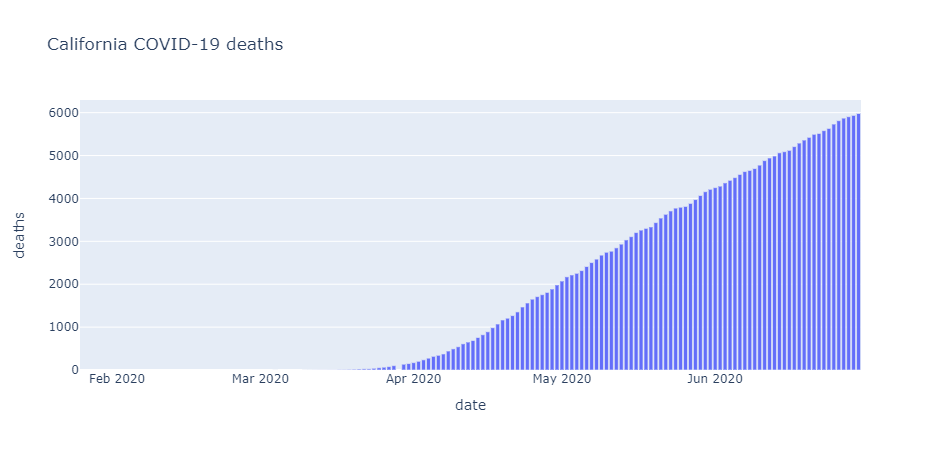

In [49]:
fig = px.bar(latimes,
           x="date",
           y="deaths",
            title="California COVID-19 deaths")

# fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Cumulative? No, we want per day values

Notice that the data reflects cumulative numbers. While this is useful, we want to create new columns that represent new values per day.

Pandas has a function that calculates the difference between values, including differences between previous or following row values. Use this function to generate value lists for columns that we want to chart.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

In [50]:
# create a new column with diff values for deaths
new_deaths = latimes['deaths'].diff(periods=-1)
# add it to our dataframe
latimes['new_deaths'] = new_deaths

### Make it into a function
We want to repeat this process—creating a new column and adding it to our dataframe—multiple times. Whenever something is repetitive, it should ring a bell that says, "time for a function!"

In [51]:
# function to calculate difference between today and previous day
def AddDiffColumn(column,newcolumn):
    latimes[newcolumn] = latimes[column].diff(periods=-1)


In [52]:
AddDiffColumn('confirmed_cases','new_cases')
AddDiffColumn('age_0_to_17','new_age_0_to_17')
AddDiffColumn('age_18_to_49','new_age_18_to_49')
AddDiffColumn('age_50_to_64','new_age_50_to_64')
AddDiffColumn('age_65_and_up','new_age_65_and_up')
AddDiffColumn('age_18_to_64','new_age_18_to_64')
AddDiffColumn('age_unknown','new_age_unknown')


# Stats
Get some stats about our data using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html" target="_blank">.describe()</a>.

In [53]:
print(latimes.new_cases.describe())
print(latimes.new_deaths.describe())


count     156.000000
mean     1428.955128
std      1518.235607
min         0.000000
25%         9.750000
50%      1267.000000
75%      2171.250000
max      7149.000000
Name: new_cases, dtype: float64
count    111.000000
mean      53.855856
std       31.631068
min        0.000000
25%       31.000000
50%       59.000000
75%       79.000000
max      115.000000
Name: new_deaths, dtype: float64


### Plot per day values

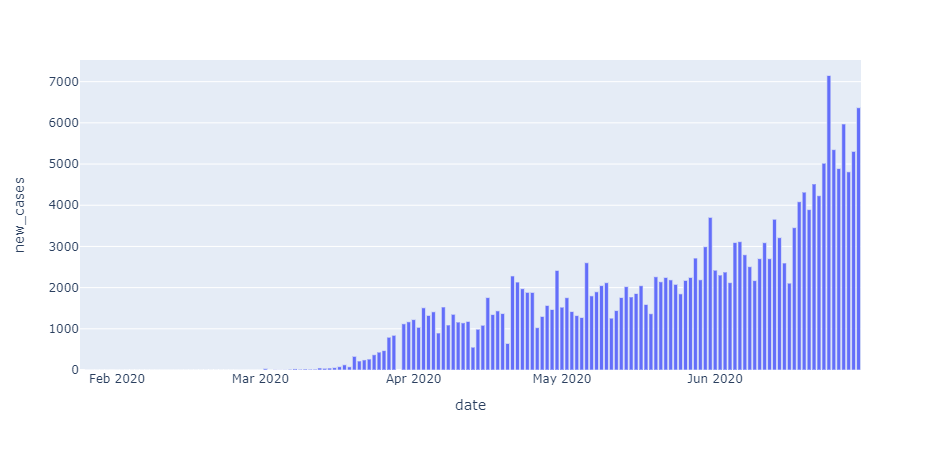

In [54]:
fig = px.bar(latimes,
           x="date",
           y="new_cases")

# fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Subplots

Sometimes we want to see data side by side. To create subplots, which allows for multiple charts in a single visualization, we will use the plotly library (not the plotly express), which allows for more advanced customization of our charts.

https://plotly.com/python/subplots/

Here is the syntax to create a simple bar chart. Notice the minor differences in the syntax compared to plotly express.

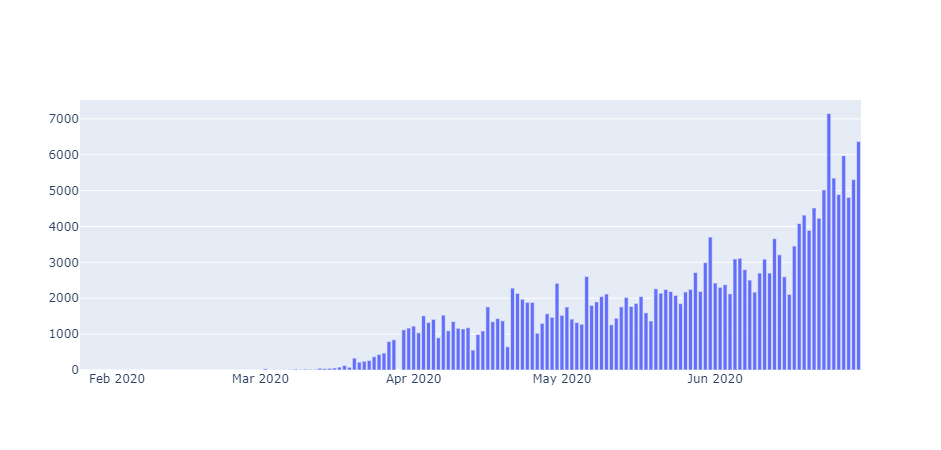

In [55]:
# import the plotly subplot library
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# chart new cases
fig = go.Figure([go.Bar(x=latimes.date, y=latimes.new_cases)])

fig.show()

And now for subplots:

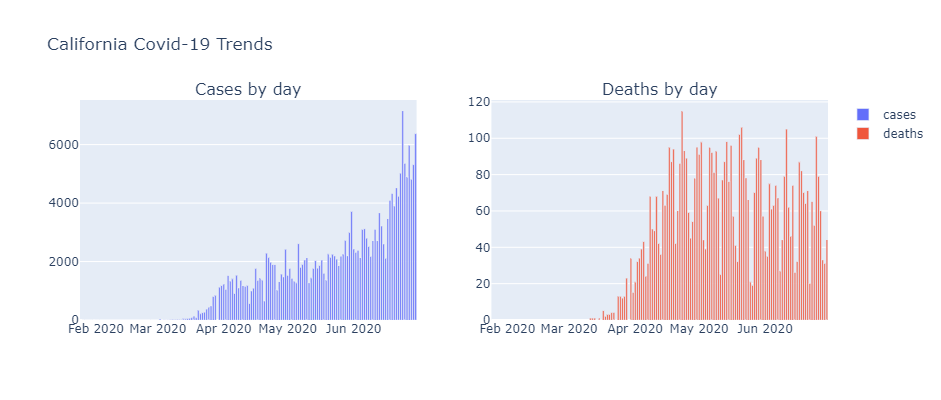

In [56]:
# define the subplots
fig = make_subplots(
            rows=1, 
            cols=2,
            subplot_titles=('Cases by day', 'Deaths by day'))

# add the first "trace"
fig.add_trace(
    go.Bar(x=latimes.date,
           y=latimes.new_cases,
           name='cases'),
    row=1, col=1
)

# add the second
fig.add_trace(
    go.Bar(x=latimes.date,
           y=latimes.new_deaths,
           name='deaths'),
    row=1, col=2
)

# define the layout for the whole figure
fig.update_layout(height=400, title_text="California Covid-19 Trends")

fig.show()

In [77]:
rollingright = latimes.new_cases[::-1].rolling(window=7).mean()
rollingright3 = latimes.new_cases[::-1].rolling(window=3).mean()

In [78]:
len(latimes.date)

157

In [79]:
len(rolling)
rolling.tail()

152    0.571429
153    0.571429
154    0.571429
155    0.428571
156         NaN
Name: new_cases, dtype: float64

In [75]:
rolling3 = latimes.new_cases.rolling(window=3).mean()

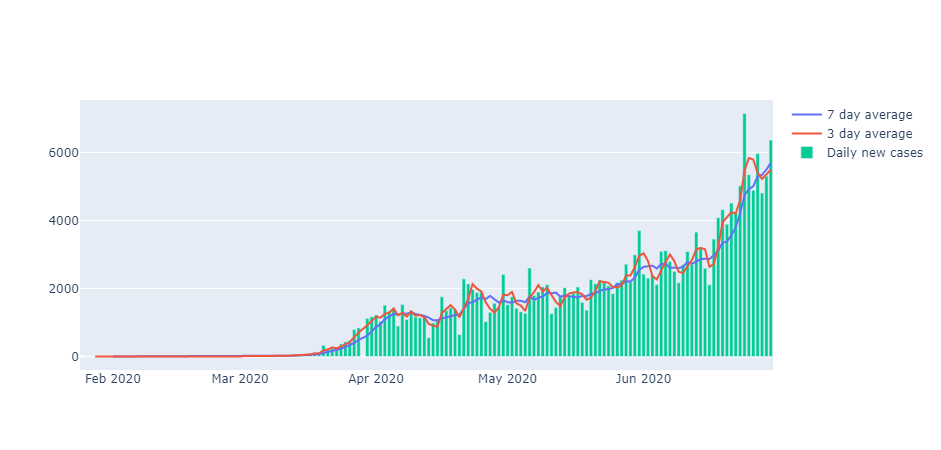

In [80]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=latimes.date[::-1], y=rollingright, name="7 day average"))
fig.add_trace(go.Scatter(x=latimes.date[::-1], y=rollingright3, name="3 day average"))
fig.add_trace(go.Bar(x=latimes.date[::-1], y=latimes.new_cases[::-1], name="Daily new cases"))
fig.show()